<a href="https://colab.research.google.com/github/DeepankarAcharyya/Detecting-vehicles/blob/main/Car_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
base_dir = "/content/gdrive/MyDrive/Projects-Misc/Vehicle_Identification"

In [4]:
print(os.listdir(base_dir))

['lyft-udacity-challenge.zip', 'dataA', 'dataB', 'dataC', 'dataD', 'dataE', 'dataa', 'datab', 'datac', 'datad', 'datae']


In [5]:
image_dir = os.path.join(base_dir,"dataa","dataA","CameraRGB")
mask_dir = os.path.join(base_dir,"dataa","dataA","CameraSeg")

In [6]:
images_names = os.listdir(image_dir)
masks_names = os.listdir(mask_dir)
print(len(images_names))
print(len(masks_names))

1000
1000


In [40]:
image = cv2.imread(os.path.join(image_dir,images_names[2]))
mask = cv2.imread(os.path.join(mask_dir,images_names[2]))

In [48]:
image.shape

(600, 800, 3)

In [41]:
mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(image.shape[0], image.shape[1])

Text(0.5, 1.0, 'Segmentation')

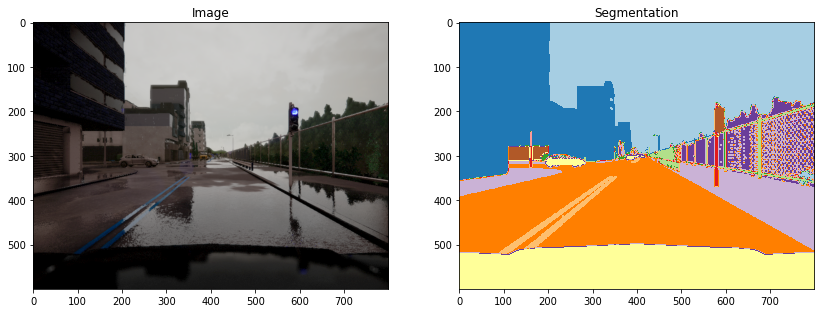

In [42]:
fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(image)
arr[0].set_title('Image')
arr[1].imshow(mask, cmap='Paired')
arr[1].set_title('Segmentation')

In [47]:
np.unique(mask)

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8)

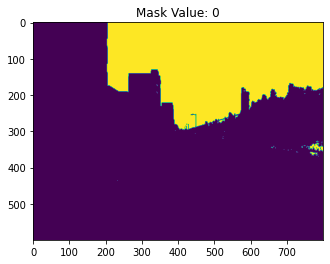

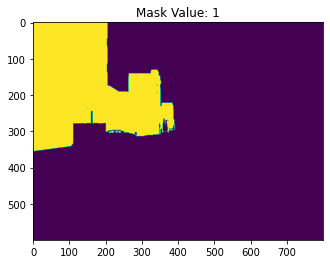

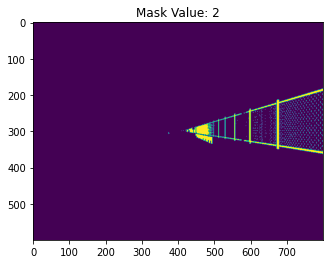

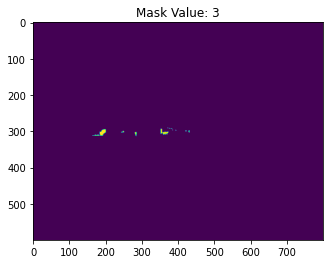

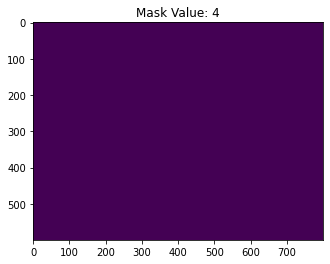

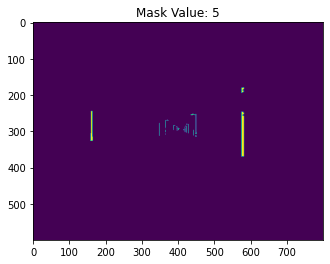

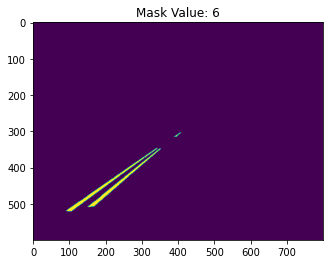

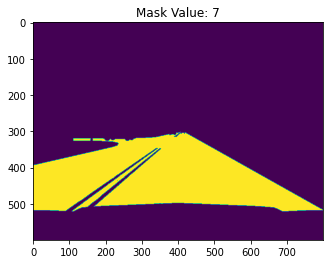

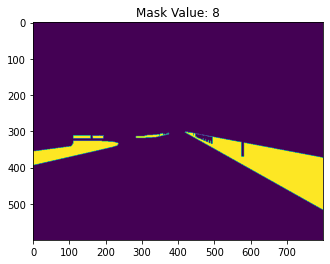

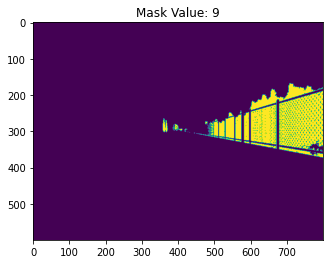

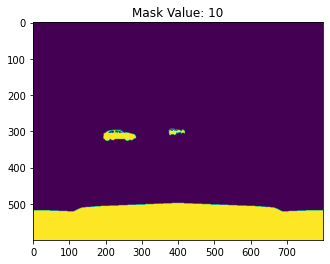

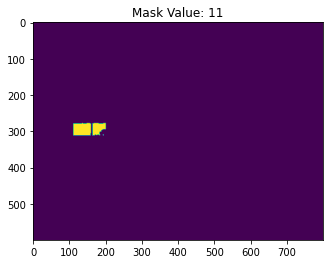

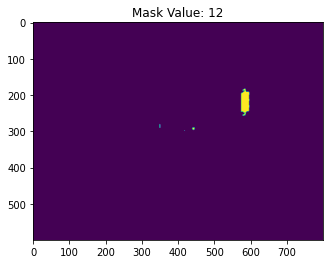

In [78]:
for i in range(13):
  plt.figure()
  plt.title('Mask Value: '+str(i))
  image_mask = np.zeros((600, 800))
  image_mask[np.where(mask==i)[0], np.where(mask==i)[1]]=1
  plt.imshow(image_mask)
  plt.show()

## From the above plots we got to know that for identifying cars/vehicles, we have to use the mask value = 10